In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import math as m
%matplotlib inline

import torch
import torchvision

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random

from torch.utils.data import Dataset, DataLoader
from mpl_toolkits.mplot3d import Axes3D

In [359]:
y = np.random.randint(0,10,1000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i) 
x = np.zeros((1000,2))

x0=x[idx[0],:] = np.random.multivariate_normal(mean = [2,2],cov=[[0.01,0],[0,0.01]],size=sum(idx[0]))


x[idx[1],:] = np.random.multivariate_normal(mean = [0,-2],cov=[[0.01,0],[0,0.01]],size=sum(idx[1]))


x[idx[2],:] = np.random.multivariate_normal(mean = [-2,2],cov=[[0.01,0],[0,0.01]],size=sum(idx[2]))



x[idx[3],:] = np.random.multivariate_normal(mean = [0,0],cov=[[0.01,0],[0,0.01]],size=sum(idx[3]))


x[idx[4],:] = np.random.multivariate_normal(mean =[-2,-4] ,cov=[[0.01,0],[0,0.01]],size=sum(idx[4]))



x[idx[5],:] = np.random.multivariate_normal(mean = [2,-4],cov=[[0.01,0],[0,0.01]],size=sum(idx[5]))


x[idx[6],:] = np.random.multivariate_normal(mean = [-4,0],cov=[[0.01,0],[0,0.01]],size=sum(idx[6]))


x[idx[7],:] = np.random.multivariate_normal(mean = [-2,4],cov=[[0.01,0],[0,0.01]],size=sum(idx[7]))


x[idx[8],:] = np.random.multivariate_normal(mean = [2,4],cov=[[0.01,0],[0,0.01]],size=sum(idx[8]))


x[idx[9],:] = np.random.multivariate_normal(mean = [4,0],cov=[[0.01,0],[0,0.01]],size=sum(idx[9]))

idx= []
for i in range(10):
    #print(i,sum(y==i))
    idx.append(y==i)

0 110
1 94
2 93
3 104
4 99
5 117
6 103
7 88
8 93
9 99


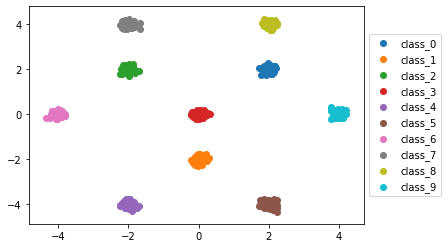

In [360]:
for i in range(10):
    plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [361]:
z = np.zeros((1000,1))
x = np.concatenate((x, z) , axis =1)
x

array([[-2.09381141,  3.87026222,  0.        ],
       [-2.02955427,  4.00523001,  0.        ],
       [ 2.06925939, -4.0951673 ,  0.        ],
       ...,
       [ 1.9136365 ,  4.19982582,  0.        ],
       [ 2.04053719,  2.05653997,  0.        ],
       [-0.09216014, -2.03183161,  0.        ]])

In [362]:
x.shape

(1000, 3)

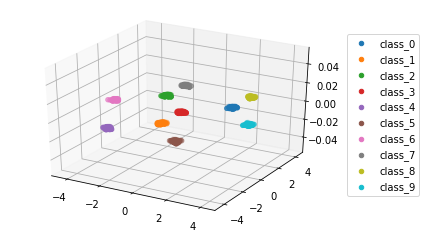

In [363]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    ax.scatter(x[idx[i],0],x[idx[i],1],x[idx[i],2],label="class_"+str(i))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

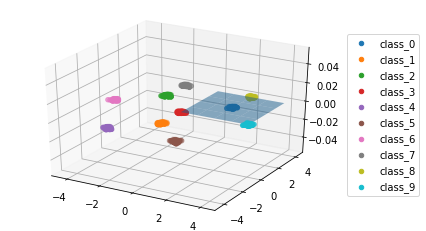

In [364]:
normal = np.array([0,0,1])
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = 0

# create x,y
xx, yy = np.meshgrid(range(5), range(5))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.5)

# fig = plt.figure()
ax = plt.gca()
for i in range(10):
    ax.scatter(x[idx[i],0],x[idx[i],1],x[idx[i],2],label="class_"+str(i))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## angle = pi/2, p1: z = 0, p2: 2x + 3y = 0
## angle = pi/6, p1: z = 0, p2: 2x + 3y + sqrt(39)z = 0
## angle = pi/3, p1: z = 0, p2: 2x + 3y + sqrt(13/3)z = 0

In [365]:
angle = np.pi/3

a = 2
b = 3
if(angle == np.pi/2):
    c=0
else:
    c = np.sqrt(a*a + b*b )/m.tan(angle)
print(c)

2.0816659994661335


In [366]:
x[idx[0],:]

array([[1.90842342, 1.92211348, 0.        ],
       [1.92983885, 1.97282042, 0.        ],
       [2.03723679, 2.17782671, 0.        ],
       [2.13132585, 1.87223531, 0.        ],
       [2.09368377, 1.97398272, 0.        ],
       [2.02769903, 2.11684081, 0.        ],
       [1.81998406, 2.0474713 , 0.        ],
       [1.9744181 , 1.96725436, 0.        ],
       [1.72518935, 2.07155217, 0.        ],
       [1.98718879, 2.27353061, 0.        ],
       [2.15635198, 2.12649691, 0.        ],
       [1.92324295, 1.89511564, 0.        ],
       [1.98015762, 1.89072422, 0.        ],
       [2.10042115, 1.91680164, 0.        ],
       [1.99312865, 2.02305107, 0.        ],
       [1.91337256, 2.13074161, 0.        ],
       [1.85520668, 2.02423729, 0.        ],
       [1.92640651, 2.02758867, 0.        ],
       [2.11883475, 1.83500845, 0.        ],
       [1.90119094, 2.07117077, 0.        ],
       [1.87999464, 1.92872836, 0.        ],
       [2.05405938, 2.11777397, 0.        ],
       [2.

In [367]:
x[idx[0],2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
if(angle == np.pi/2):
    for i in range(3):
        x[idx[i],2] = (i+2)*(x[idx[i],0] + x[idx[i],1])/(x[idx[i],0] + x[idx[i],1])
else:
    for i in range(3):
        x[idx[i],2] = (2*x[idx[i],0] + 3*x[idx[i],1])/c


In [369]:
x[idx[0],:]

array([[1.90842342, 1.92211348, 4.60361425],
       [1.92983885, 1.97282042, 4.69726601],
       [2.03723679, 2.17782671, 5.09589614],
       [2.13132585, 1.87223531, 4.74588989],
       [2.09368377, 1.97398272, 4.85635817],
       [2.02769903, 2.11684081, 4.99884251],
       [1.81998406, 2.0474713 , 4.69930432],
       [1.9744181 , 1.96725436, 4.73207483],
       [1.72518935, 2.07155217, 4.64293273],
       [1.98718879, 2.27353061, 5.18573556],
       [2.15635198, 2.12649691, 5.13636419],
       [1.92324295, 1.89511564, 4.57894438],
       [1.98015762, 1.89072422, 4.62729752],
       [2.10042115, 1.91680164, 4.78042454],
       [1.99312865, 2.02305107, 4.83046296],
       [1.91337256, 2.13074161, 4.90903438],
       [1.85520668, 2.02423729, 4.69966134],
       [1.92640651, 2.02758867, 4.77289778],
       [2.11883475, 1.83500845, 4.68023922],
       [1.90119094, 2.07117077, 4.81147994],
       [1.87999464, 1.92872836, 4.58583383],
       [2.05405938, 2.11777397, 5.02551353],
       [2.

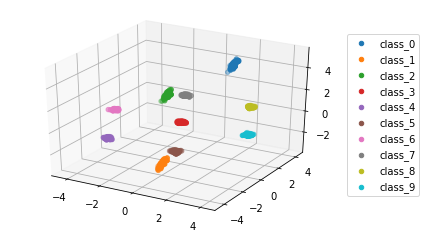

In [370]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    ax.scatter(x[idx[i],0],x[idx[i],1],x[idx[i],2],label="class_"+str(i))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

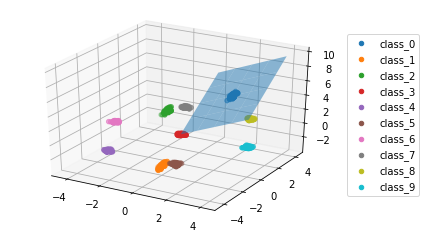

In [371]:
normal = np.array([a,b,c])
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = 0

# create x,y
xx, yy = np.meshgrid(range(5), range(5))

# calculate corresponding z
z = -(-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.5)

# fig = plt.figure()
ax = plt.gca()
for i in range(10):
    ax.scatter(x[idx[i],0],x[idx[i],1],x[idx[i],2],label="class_"+str(i))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [372]:
x.shape,y.shape

((1000, 3), (1000,))

In [0]:
classes  = ('0', '1', '2','3', '4', '5', '6', '7','8', '9')
foreground_classes = {'0', '1', '2'}

background_classes = {'3', '4', '5', '6', '7','8', '9'}


In [0]:
class sub_clust_data(Dataset):
    def __init__(self,x, y):
        self.x = torch.Tensor(x)
        self.y = torch.Tensor(y).type(torch.LongTensor)
    #self.fore_idx = fore_idx
    
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x[idx] , self.y[idx] #, self.fore_idx[idx]

In [0]:
trainset = sub_clust_data(x,y)

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)

In [0]:
dataiter = iter(trainloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10

for i in range(100):   #5000*batch_size = 50000 data points
    images, labels = dataiter.next()
    for j in range(batch_size):
        if(classes[labels[j]] in background_classes):
            img = images[j].tolist()
            background_data.append(img)
            background_label.append(labels[j])
        else:
            img = images[j].tolist()
            foreground_data.append(img)
            foreground_label.append(labels[j])

In [378]:
np.shape(foreground_data),np.shape(foreground_label)

((297, 3), (297,))

In [379]:
np.shape(background_data),np.shape(background_label)

((703, 3), (703,))

In [0]:
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label).type(torch.LongTensor)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label).type(torch.LongTensor)

In [0]:
def create_mosaic_img(bg_idx,fg_idx,fg): 
    image_list=[]
    j=0
    for i in range(9):
        if i != fg:
            image_list.append(background_data[bg_idx[j]].type("torch.DoubleTensor"))
            j+=1
        else: 
            image_list.append(foreground_data[fg_idx].type("torch.DoubleTensor"))
            label = foreground_label[fg_idx]  #-7  # minus 7 because our fore ground classes are 7,8,9 but we have to store it as 0,1,2
    #image_list = np.concatenate(image_list ,axis=0)
    image_list = torch.stack(image_list) 
    return image_list,label

In [382]:
fg_nos = np.shape(foreground_label)[0]
bg_nos = np.shape(background_label)[0]
bg_nos, fg_nos

(703, 297)

In [0]:
desired_num = 1000
mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
for i in range(desired_num):
    bg_idx = np.random.randint(0,bg_nos,8)
    fg_idx = np.random.randint(0,fg_nos)
    fg = np.random.randint(0,9)
    fore_idx.append(fg)
    image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
    mosaic_list_of_images.append(image_list)
    mosaic_label.append(label)

In [0]:
def create_avg_image_from_mosaic_dataset(mosaic_dataset,labels,foreground_index,dataset_number):
    avg_image_dataset = []
    for i in range(len(mosaic_dataset)):
        img = torch.zeros([3], dtype=torch.float64)
        for j in range(9):
            if j == foreground_index[i]:
                img = img + mosaic_dataset[i][j]*dataset_number/9
            else :
                img = img + mosaic_dataset[i][j]*(9-dataset_number)/(8*9)
    
        avg_image_dataset.append(img)
    
    return avg_image_dataset , labels , foreground_index

In [0]:
avg_image_dataset_1 , labels_1,  fg_index_1 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 1)
avg_image_dataset_2 , labels_2,  fg_index_2 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 2)
avg_image_dataset_3 , labels_3,  fg_index_3 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 3)
avg_image_dataset_4 , labels_4,  fg_index_4 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 4)
avg_image_dataset_5 , labels_5,  fg_index_5 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 5)
avg_image_dataset_6 , labels_6,  fg_index_6 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 6)
avg_image_dataset_7 , labels_7,  fg_index_7 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 7)
avg_image_dataset_8 , labels_8,  fg_index_8 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 8)
avg_image_dataset_9 , labels_9,  fg_index_9 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[0:1000], mosaic_label[0:1000], fore_idx[0:1000] , 9)

#test_dataset_10 , labels_10 , fg_index_10 = create_avg_image_from_mosaic_dataset(mosaic_list_of_images[10000:20000], mosaic_label[10000:20000], fore_idx[10000:20000] , 9)

In [0]:
class MosaicDataset(Dataset):
    """MosaicDataset dataset."""

    def __init__(self, mosaic_list_of_images, mosaic_label):
        """
          Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.mosaic = mosaic_list_of_images
        self.label = mosaic_label
        #self.fore_idx = fore_idx
    
    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        return self.mosaic[idx] , self.label[idx] #, self.fore_idx[idx]

In [0]:
batch = 256


# training_data = avg_image_dataset_5    #just change this and training_label to desired dataset for training
# training_label = labels_5

traindata_1 = MosaicDataset(avg_image_dataset_1, labels_1 )
trainloader_1 = DataLoader( traindata_1 , batch_size= batch ,shuffle=True)

traindata_2 = MosaicDataset(avg_image_dataset_2, labels_2 )
trainloader_2 = DataLoader( traindata_2 , batch_size= batch ,shuffle=True)

traindata_3 = MosaicDataset(avg_image_dataset_3, labels_3 )
trainloader_3 = DataLoader( traindata_3 , batch_size= batch ,shuffle=True)

traindata_4 = MosaicDataset(avg_image_dataset_4, labels_4 )
trainloader_4 = DataLoader( traindata_4 , batch_size= batch ,shuffle=True)

traindata_5 = MosaicDataset(avg_image_dataset_5, labels_5 )
trainloader_5 = DataLoader( traindata_5 , batch_size= batch ,shuffle=True)

traindata_6 = MosaicDataset(avg_image_dataset_6, labels_6 )
trainloader_6 = DataLoader( traindata_6 , batch_size= batch ,shuffle=True)

traindata_7 = MosaicDataset(avg_image_dataset_7, labels_7 )
trainloader_7 = DataLoader( traindata_7 , batch_size= batch ,shuffle=True)

traindata_8 = MosaicDataset(avg_image_dataset_8, labels_8 )
trainloader_8 = DataLoader( traindata_8 , batch_size= batch ,shuffle=True)

traindata_9 = MosaicDataset(avg_image_dataset_9, labels_9 )
trainloader_9 = DataLoader( traindata_9 , batch_size= batch ,shuffle=True)

testdata_1 = MosaicDataset(avg_image_dataset_1, labels_1 )
testloader_1 = DataLoader( testdata_1 , batch_size= batch ,shuffle=False)

testdata_2 = MosaicDataset(avg_image_dataset_2, labels_2 )
testloader_2 = DataLoader( testdata_2 , batch_size= batch ,shuffle=False)

testdata_3 = MosaicDataset(avg_image_dataset_3, labels_3 )
testloader_3 = DataLoader( testdata_3 , batch_size= batch ,shuffle=False)

testdata_4 = MosaicDataset(avg_image_dataset_4, labels_4 )
testloader_4 = DataLoader( testdata_4 , batch_size= batch ,shuffle=False)

testdata_5 = MosaicDataset(avg_image_dataset_5, labels_5 )
testloader_5 = DataLoader( testdata_5 , batch_size= batch ,shuffle=False)

testdata_6 = MosaicDataset(avg_image_dataset_6, labels_6 )
testloader_6 = DataLoader( testdata_6 , batch_size= batch ,shuffle=False)

testdata_7 = MosaicDataset(avg_image_dataset_7, labels_7 )
testloader_7 = DataLoader( testdata_7 , batch_size= batch ,shuffle=False)

testdata_8 = MosaicDataset(avg_image_dataset_8, labels_8 )
testloader_8 = DataLoader( testdata_8 , batch_size= batch ,shuffle=False)

testdata_9 = MosaicDataset(avg_image_dataset_9, labels_9 )
testloader_9 = DataLoader( testdata_9 , batch_size= batch ,shuffle=False)



In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(3,64)
        self.linear2 = nn.Linear(64,128)
        
        self.linear3 = nn.Linear(128,3)
        
    def forward(self,x):
        x = F.relu(self.linear1(x))
        
        x = F.relu(self.linear2(x))
        
        x = self.linear3(x)
        
        return x

In [0]:
def test_all(number, testloader,inc):
    correct = 0
    total = 0
    out = []
    pred = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to("cuda"),labels.to("cuda")
            out.append(labels.cpu().numpy())
            outputs= inc(images)
            _, predicted = torch.max(outputs.data, 1)
            pred.append(predicted.cpu().numpy())
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 1000 test dataset %d: %d %%' % (number , 100 * correct / total))
    return 100 * correct / total

In [0]:
def train_all(trainloader, ds_number, testloader_list):
    
    print("--"*40)
    print("training on data set  ", ds_number)
    
    inc = Net().double()
    inc = inc.to("cuda")
    
    criterion_inception = nn.CrossEntropyLoss()
    optimizer_inception = optim.SGD(inc.parameters(), lr=0.01, momentum=0.9)
    
    acti = []
    loss_curi = []
    epochs = 70
    
    for epoch in range(epochs): # loop over the dataset multiple times
        ep_lossi = []

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            inputs, labels = inputs.to("cuda"),labels.to("cuda")

            # zero the parameter gradients
            optimizer_inception.zero_grad()

            # forward + backward + optimize
            outputs = inc(inputs)
            loss = criterion_inception(outputs, labels)
            loss.backward()
            optimizer_inception.step()

            # print statistics
            running_loss += loss.item()
            mini=4
            if i % mini == mini-1:    # print every 10 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / mini))
                ep_lossi.append(running_loss/mini) # loss per minibatch
                running_loss = 0.0
        
        # if(np.mean(ep_lossi)<=0.01):
        #     break
        loss_curi.append(np.mean(ep_lossi))   #loss per epoch




    print('Finished Training')
#     torch.save(inc.state_dict(),"/content/drive/My Drive/Research/Experiments on CIFAR mosaic/Exp_2_Attention_models_on_9_datasets_made_from_10k_mosaic/weights/train_dataset_"+str(ds_number)+"_"+str(epochs)+".pt")
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            images, labels = images.to("cuda"), labels.to("cuda")
            outputs = inc(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 1000 train images: %d %%' % (  100 * correct / total))
    
    test_list=[]
    for i, j in enumerate(testloader_list):
        test_list.append(test_all(i+1, j,inc))
    
    print("--"*40)
    
    return loss_curi,test_list

In [391]:
train_loss_all=[]

testloader_list= [ testloader_1, testloader_2, testloader_3, testloader_4, testloader_5, testloader_6,
                 testloader_7, testloader_8, testloader_9]

test1 = train_loss_all.append(train_all(trainloader_1, 1, testloader_list))
test2 = train_loss_all.append(train_all(trainloader_2, 2, testloader_list))
test3 = train_loss_all.append(train_all(trainloader_3, 3, testloader_list))
test4 = train_loss_all.append(train_all(trainloader_4, 4, testloader_list))
test5 = train_loss_all.append(train_all(trainloader_5, 5, testloader_list))
test6 = train_loss_all.append(train_all(trainloader_6, 6, testloader_list))
test7 = train_loss_all.append(train_all(trainloader_7, 7, testloader_list))
test8 = train_loss_all.append(train_all(trainloader_8, 8, testloader_list))
test9 = train_loss_all.append(train_all(trainloader_9, 9, testloader_list))

--------------------------------------------------------------------------------
training on data set   1
[1,     4] loss: 1.091
[2,     4] loss: 1.075
[3,     4] loss: 1.052
[4,     4] loss: 1.030
[5,     4] loss: 1.010
[6,     4] loss: 0.988
[7,     4] loss: 0.965
[8,     4] loss: 0.939
[9,     4] loss: 0.912
[10,     4] loss: 0.880
[11,     4] loss: 0.849
[12,     4] loss: 0.814
[13,     4] loss: 0.778
[14,     4] loss: 0.738
[15,     4] loss: 0.699
[16,     4] loss: 0.656
[17,     4] loss: 0.615
[18,     4] loss: 0.574
[19,     4] loss: 0.535
[20,     4] loss: 0.497
[21,     4] loss: 0.462
[22,     4] loss: 0.429
[23,     4] loss: 0.397
[24,     4] loss: 0.368
[25,     4] loss: 0.340
[26,     4] loss: 0.314
[27,     4] loss: 0.289
[28,     4] loss: 0.266
[29,     4] loss: 0.245
[30,     4] loss: 0.225
[31,     4] loss: 0.206
[32,     4] loss: 0.189
[33,     4] loss: 0.174
[34,     4] loss: 0.159
[35,     4] loss: 0.146
[36,     4] loss: 0.134
[37,     4] loss: 0.123
[38,     4] los

Text(0, 0.5, 'train accuracy')

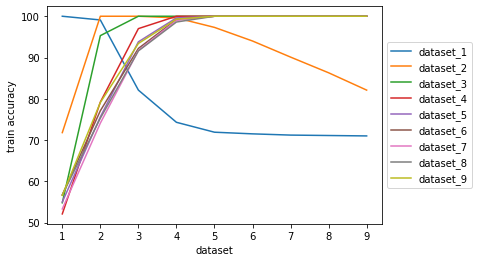

In [392]:
ds = np.arange(1,10)
for i in range(9):
  plt.plot(ds,train_loss_all[i][1], label="dataset_"+str(i+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("dataset")
plt.ylabel("train accuracy")

Text(0, 0.5, 'log loss')

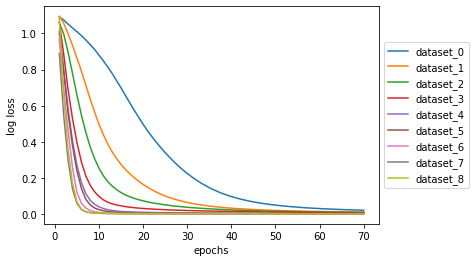

In [393]:
ds = np.arange(1,71)
for i in range(9):
  plt.plot(ds,train_loss_all[i][0], label="dataset_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("log loss")